In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin1')



In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df.duplicated().sum()

403

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
df.shape

(5572, 5)

In [ ]:
# data handling

In [20]:
df.drop(columns = [ "Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True )

In [21]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# HERE V2 IS INPUT TEXT  AND V1 IS OUTPUT TARGET 

In [22]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.drop_duplicates()

In [23]:
df = df.drop_duplicates()

In [24]:
df.shape

(5169, 2)

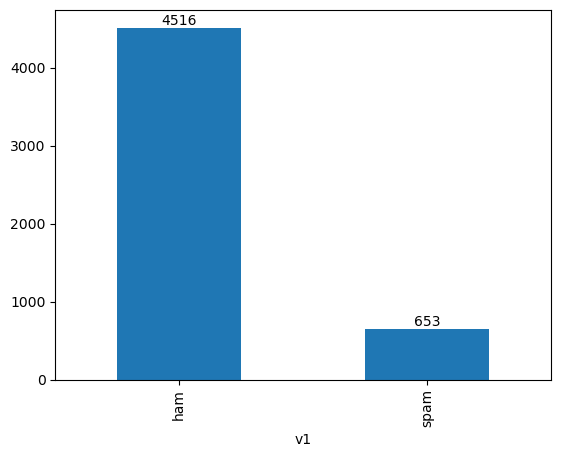

In [34]:

value_counts = df['v1'].value_counts()
ax = value_counts.plot(kind='bar')
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.05, str(v), ha='center', va='bottom')
# from  here we understand there is imbalance in data set 

In [36]:
import nltk 
!pip install nltk 

In [37]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# creating 2 new columns to perform EDA and understand the word and sentence metrics 

In [49]:
df['word_count_v2'] = df['v2'].apply(nltk.word_tokenize).apply(len)

In [51]:
df.head()

,v1,v2,word_count_v2
0,ham,"Go until jurong point, crazy.. Available only ...",24
1,ham,Ok lar... Joking wif u oni...,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,ham,U dun say so early hor... U c already then say...,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",15


In [52]:
df['sentence_count_v2'] = df['v2'].apply(nltk.sent_tokenize).apply(len)

In [53]:
df.head()

,v1,v2,word_count_v2,sentence_count_v2
0,ham,"Go until jurong point, crazy.. Available only ...",24,2
1,ham,Ok lar... Joking wif u oni...,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,ham,U dun say so early hor... U c already then say...,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",15,1


In [54]:
df.describe()

,word_count_v2,sentence_count_v2
count,5169.000000,5169.000000
mean,18.455794,1.965564
std,13.324758,1.448541
min,1.000000,1.000000
25%,9.000000,1.000000
50%,15.000000,1.000000
75%,26.000000,2.000000
max,220.000000,38.000000


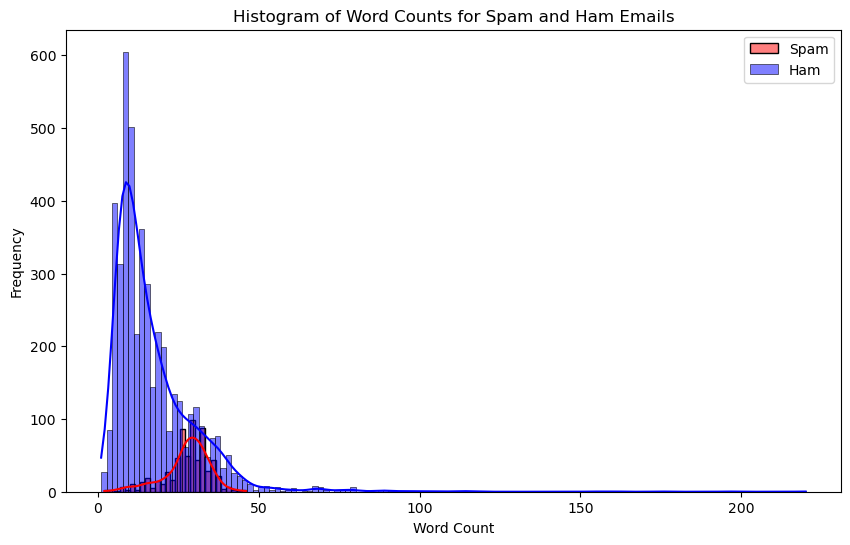

In [64]:
plt.figure(figsize=(10, 6))  
sns.histplot(spam_df['word_count_v2'], color='red', label='Spam', kde=True)
sns.histplot(ham_df['word_count_v2'], color='blue', label='Ham', kde=True)

plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts for Spam and Ham Emails')
plt.legend()
plt.show()

# from this plot we understand more spam mails are with higher word count 

In [81]:
# encoding target variable 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["v1"] = encoder.fit_transform(df["v1"]) 

In [77]:
df.head()

,v1,v2,word_count_v2,sentence_count_v2
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


C:\Users\guriv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


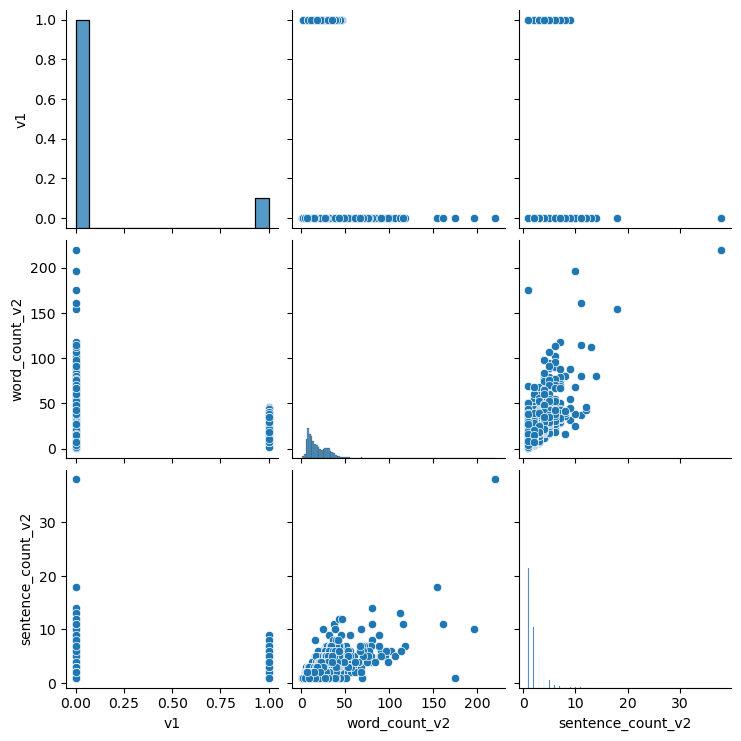

In [78]:
sns.pairplot(df)

In [82]:
df.head()

,v1,v2,word_count_v2,sentence_count_v2
0,0,"Go until jurong point, crazy.. Available only ...",24,2
1,0,Ok lar... Joking wif u oni...,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2
3,0,U dun say so early hor... U c already then say...,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1


In [ ]:
# Text preprocessing 

In [93]:
from nltk.corpus  import stopwords


In [117]:
import string 
from nltk.stem.porter import PorterStemmer


In [114]:
def preprocess_text(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

In [115]:
df["transformed"] = df["v2"].apply(preprocess_text )



In [118]:
df.head()

,v1,v2,word_count_v2,sentence_count_v2,transformed
0,0,"Go until jurong point, crazy.. Available only ...",24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,nah think goe usf live around though


In [121]:
pip install wordcloud 

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --------- ----------------------------- 71.7/300.2 kB 787.7 kB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [122]:

from wordcloud import WordCloud
wc= WordCloud( height = 700, width = 700, min_font_size = 10, background_color = "black")

In [125]:
 spam_word = wc.generate(df[df["v1"] == 1]["transformed"].str.cat(sep = " "))

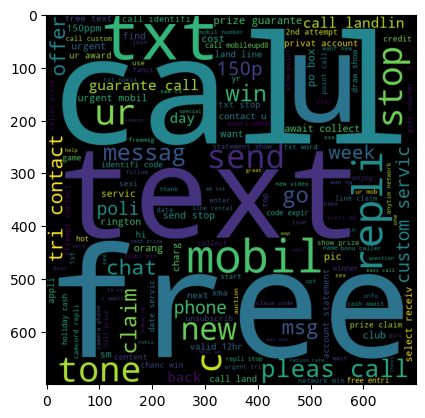

In [126]:
plt.imshow(spam_word)

In [127]:
df.head()

,v1,v2,word_count_v2,sentence_count_v2,transformed
0,0,"Go until jurong point, crazy.. Available only ...",24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,nah think goe usf live around though


In [ ]:
# text vectorization

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [129]:
X = cv.fit_transform(df["transformed"]).toarray()

In [135]:
X.shape

(5169, 6708)

In [137]:
y= df["v1"]


In [138]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [144]:
from sklearn.metrics import accuracy_score, precision_score


gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

# Predictions
gnb_predictions = gnb.predict(X_test)
mnb_predictions = mnb.predict(X_test)
bnb_predictions = bnb.predict(X_test)


gnb_accuracy = accuracy_score(y_test, gnb_predictions)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
bnb_accuracy = accuracy_score(y_test, bnb_predictions)

gnb_precision = precision_score(y_test, gnb_predictions)
mnb_precision = precision_score(y_test, mnb_predictions)
bnb_precision = precision_score(y_test, bnb_predictions)

print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Gaussian Naive Bayes Precision:", gnb_precision)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)
print("Multinomial Naive Bayes Precision:", mnb_precision)
print("Bernoulli Naive Bayes Accuracy:", bnb_accuracy)
print("Bernoulli Naive Bayes Precision:", bnb_precision)


Gaussian Naive Bayes Accuracy: 0.8684719535783365
Gaussian Naive Bayes Precision: 0.5185185185185185
Multinomial Naive Bayes Accuracy: 0.9738878143133463
Multinomial Naive Bayes Precision: 0.8881578947368421
Bernoulli Naive Bayes Accuracy: 0.9661508704061895
Bernoulli Naive Bayes Precision: 0.9661016949152542


In [141]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_classifier = SVC(kernel='linear', random_state=42)


svm_classifier.fit(X_train, y_train)


svm_predictions = svm_classifier.predict(X_test)


svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)


Support Vector Machine (SVM) Accuracy: 0.9816247582205029


In [ ]:
# using tfidf vectorizer 

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["transformed"]).toarray()


In [157]:
X.shape

(5169, 6708)

In [158]:


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score, precision_score

GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)


gnb_predictions = gnb.predict(X_test)
mnb_predictions = mnb.predict(X_test)
bnb_predictions = bnb.predict(X_test)

gnb_accuracy = accuracy_score(y_test, gnb_predictions)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
bnb_accuracy = accuracy_score(y_test, bnb_predictions)


gnb_precision = precision_score(y_test, gnb_predictions)
mnb_precision = precision_score(y_test, mnb_predictions)
bnb_precision = precision_score(y_test, bnb_predictions)


print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Gaussian Naive Bayes Precision:", gnb_precision)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)
print("Multinomial Naive Bayes Precision:", mnb_precision)
print("Bernoulli Naive Bayes Accuracy:", bnb_accuracy)
print("Bernoulli Naive Bayes Precision:", bnb_precision)


Gaussian Naive Bayes Accuracy: 0.8636363636363636
Gaussian Naive Bayes Precision: 0.5084033613445378
Multinomial Naive Bayes Accuracy: 0.9613152804642167
Multinomial Naive Bayes Precision: 0.9906542056074766
Bernoulli Naive Bayes Accuracy: 0.9661508704061895
Bernoulli Naive Bayes Precision: 0.9661016949152542


In [ ]:
# Precision value increased with tfidf technique 

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_classifier = KNeighborsClassifier()


rf_classifier = RandomForestClassifier()

knn_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

knn_predictions = knn_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate precision
knn_precision = precision_score(y_test, knn_predictions)
rf_precision = precision_score(y_test, rf_predictions)

# Print accuracy and precision
print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)


KNN Accuracy: 0.8965183752417795
KNN Precision: 1.0
Random Forest Accuracy: 0.9671179883945842
Random Forest Precision: 1.0


In [ ]:
# here am using mnb and tfidf approach 

In [159]:
import pickle 
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("mnb.pkl", "wb"))